<a href="https://colab.research.google.com/github/sahinded/DeepLearning/blob/main/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


### Data Wrangling

In [7]:
matplotlib.__version__

'3.2.2'

In [8]:
#!pip install matplotlib==3.4

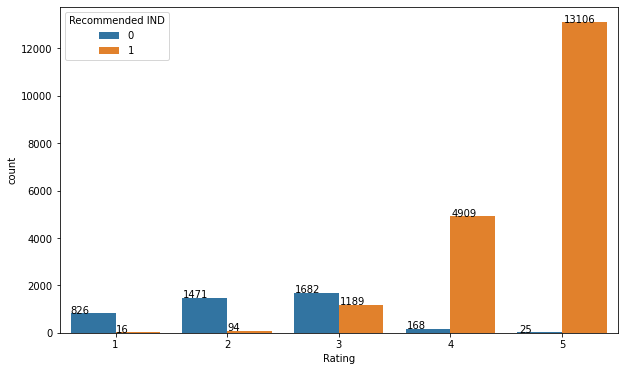

In [9]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Rating', data=df, hue= 'Recommended IND')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1))

In [10]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [11]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [12]:
df.groupby('Rating')["Recommended IND"].value_counts()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       1                   4909
        0                    168
5       1                  13106
        0                     25
Name: Recommended IND, dtype: int64

In [13]:
df[(df['Rating']==1) & (df['Recommended IND']==1)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2427,939,39,NaN,Beautiful jacket and i got lots of compliments...,1,1,0,General,Tops,Sweaters
2872,829,51,NaN,Very cute top. i went down a size because for ...,1,1,1,General Petite,Tops,Blouses
5570,861,69,Great t,I love this t-shirt because it has the combina...,1,1,0,General,Tops,Knits
6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it fal...,1,1,0,General,Tops,Blouses
7740,872,44,Odd neckline,I loved the color and design until i tried it ...,1,1,0,General,Tops,Knits
7850,956,43,NaN,"This is so close to perfect, but there's a sea...",1,1,1,General Petite,Jackets,Jackets
9877,1084,58,NaN,"I loved the dress, but just not dressy enough ...",1,1,5,General Petite,Dresses,Dresses
10517,1110,44,Beautiful dress; so excited to wear it!!!,I saw this dress in the catalog and had to hav...,1,1,0,General,Dresses,Dresses
13607,1075,48,Great dress,Such a great dress. fit is flattering. the sma...,1,1,0,General,Dresses,Dresses
16194,1081,68,NaN,This is an extremely flattering dress. i could...,1,1,1,General Petite,Dresses,Dresses


In [14]:
df.shape

(23486, 10)

In [15]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

In [16]:
df.shape

(21994, 10)

In [17]:
len(df[((df["Rating"] == 1) & (df["Recommended IND"] == 0))])

826

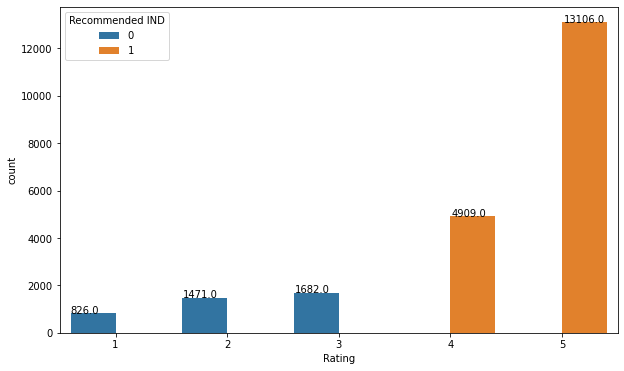

In [18]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1))

#### Check Proportion of Target Class Variable:

In [19]:
df.shape

(21994, 10)

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

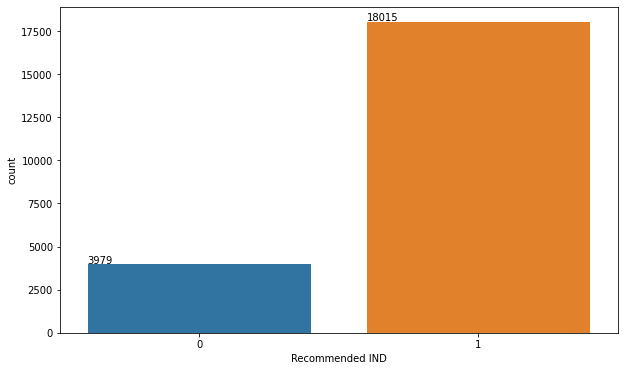

In [20]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [21]:
df = df[['Review Text', 'Recommended IND']]

In [22]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [23]:
df.isnull().sum()

Review Text        819
Recommended IND      0
dtype: int64

In [24]:
df['Review Text'].isnull().sum()/ df.shape[0]

0.03723742838956079

In [25]:
df.shape[0]

21994

In [26]:
df.dropna(inplace=True)

In [27]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [28]:
df.shape

(21175, 2)

In [29]:
df.isnull().sum()

Review Text        0
Recommended IND    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [30]:
stop_words= stopwords.words('english')

In [31]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
a=['not','no']
for i in a:
  stop_words.remove(i)


In [33]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [35]:
positive_sentences = df[df["Recommended IND"] == 1]["Review Text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23476    bottom cute defiantly cheeky would recommend s...
23477    im impressed beautiful color combination embro...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23485    dress lovely platinum feminine fit perfectly e...
Name: Review Text, Length: 17261, dtype: object

In [36]:
negative_sentences = df[df["Recommended IND"] == 0]["Review Text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: Review Text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [37]:
positive_words = ' '.join(positive_sentences)
positive_words[:500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh '

In [38]:
negative_words = ' '.join(negative_sentences)
negative_words[:500]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would ta'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
from wordcloud import WordCloud

In [44]:
wordcloud_positive = WordCloud(background_color="black", max_words =250)

In [45]:
wordcloud_positive.generate(positive_words)

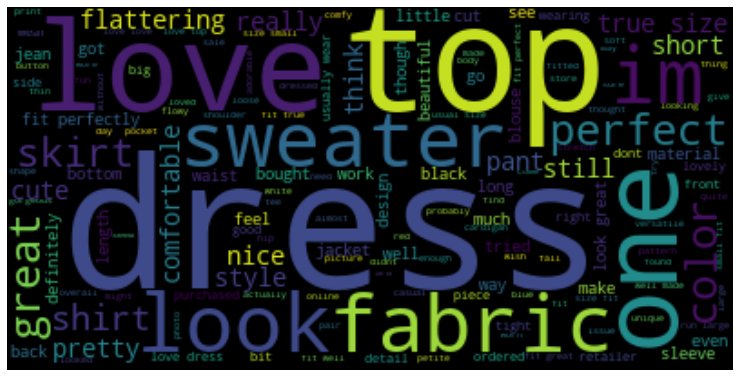

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

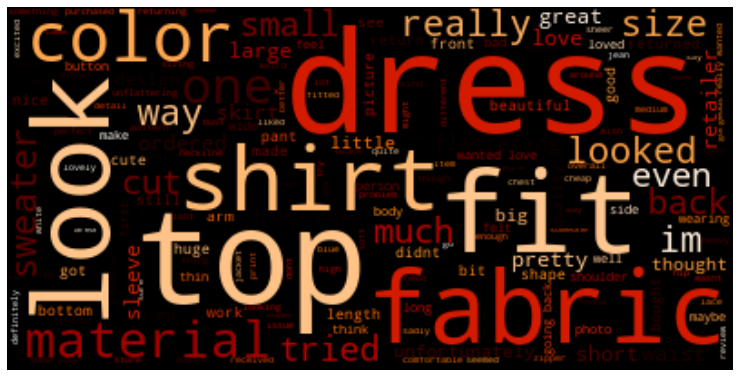

In [47]:
wordcloud_negative = WordCloud(background_color="black", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df["Review Text"].values
y = df["Recommended IND"].map({0:1, 1:0}).values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [56]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abroad,...,zero,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=2)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [60]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abroad,...,zero,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

### CountVectorizer

In [73]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.02, max_iter=1000, class_weight= "balanced", random_state=42)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [75]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [76]:
eval(log, X_train_count, X_test_count)

[[3022  430]
 [ 100  683]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.61      0.87      0.72       783

    accuracy                           0.87      4235
   macro avg       0.79      0.87      0.82      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.66      0.92      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.90      0.85     16940
weighted avg       0.92      0.90      0.90     16940



In [83]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.08, max_iter=1000, class_weight= "balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.889965
test_f1           0.743294
test_recall       0.861706
test_precision    0.653618
dtype: float64

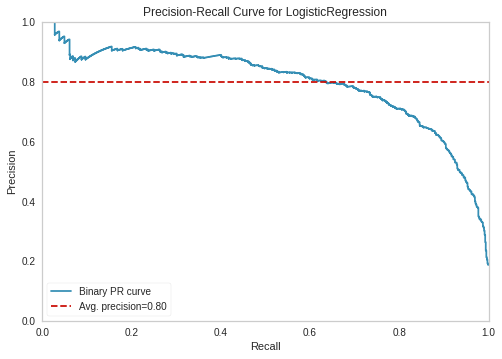

In [84]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.08, max_iter=1000, class_weight= "balanced", random_state=42),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [85]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [86]:
log = LogisticRegression(C=0.08, max_iter=1000, random_state=42, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.08, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [87]:
eval(log, X_train_tf_idf, X_test_tf_idf)

[[2968  484]
 [  99  684]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.59      0.87      0.70       783

    accuracy                           0.86      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.62      0.91      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [88]:
model = LogisticRegression(C=0.08, max_iter=1000, random_state=42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.868536
test_f1           0.712833
test_recall       0.882146
test_precision    0.598187
dtype: float64

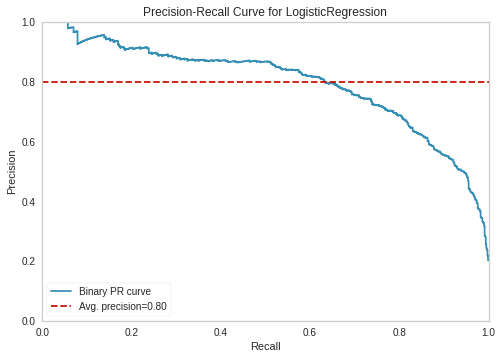

In [90]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.08, max_iter=1000, random_state=42, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [92]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1)

In [93]:
eval(nb, X_train_count, X_test_count)

[[3231  221]
 [ 171  612]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3452
           1       0.73      0.78      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.77      0.85      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.87      0.90      0.88     16940
weighted avg       0.93      0.92      0.93     16940



In [94]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.904664
test_f1           0.753610
test_recall       0.788884
test_precision    0.721700
dtype: float64

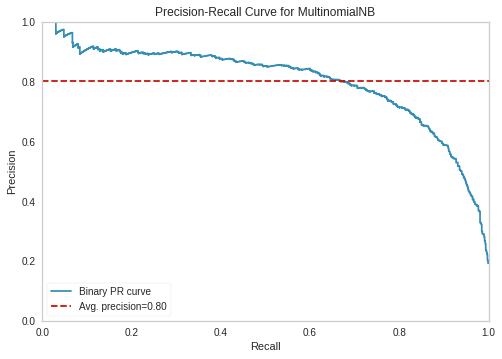

In [95]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [96]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [97]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1)

In [98]:
eval(nb, X_train_tf_idf, X_test_tf_idf)

[[3227  225]
 [ 204  579]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3452
           1       0.72      0.74      0.73       783

    accuracy                           0.90      4235
   macro avg       0.83      0.84      0.83      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.82      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.88      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [100]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy     0.896045
test_f1           0.728200
test_recall       0.753440
test_precision    0.704980
dtype: float64

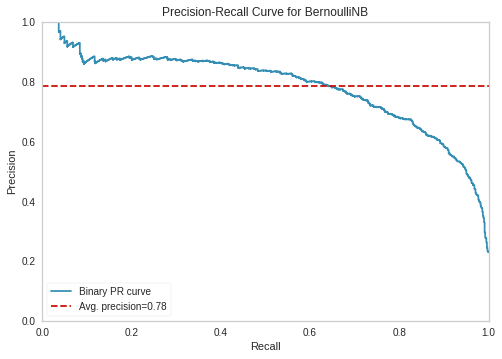

In [101]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=1),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [102]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [103]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.005, class_weight="balanced", random_state=42)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.005, class_weight='balanced', random_state=42)

In [104]:
eval(svc, X_train_count, X_test_count)

[[3053  399]
 [ 103  680]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.63      0.87      0.73       783

    accuracy                           0.88      4235
   macro avg       0.80      0.88      0.83      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     13809
           1       0.69      0.93      0.79      3131

    accuracy                           0.91     16940
   macro avg       0.84      0.92      0.87     16940
weighted avg       0.93      0.91      0.92     16940



In [105]:
model = LinearSVC(C=0.005, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.889374
test_f1           0.743363
test_recall       0.866497
test_precision    0.651046
dtype: float64

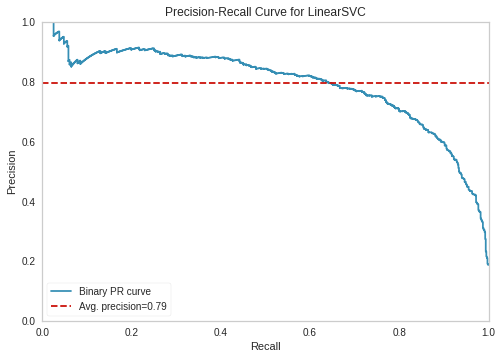

In [107]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.005, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [108]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [110]:
svc = LinearSVC(C=0.05, class_weight="balanced", random_state=42)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.05, class_weight='balanced', random_state=42)

In [111]:
eval(svc, X_train_tf_idf, X_test_tf_idf)

[[3038  414]
 [  95  688]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.88      0.73       783

    accuracy                           0.88      4235
   macro avg       0.80      0.88      0.83      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13809
           1       0.68      0.94      0.79      3131

    accuracy                           0.91     16940
   macro avg       0.83      0.92      0.87     16940
weighted avg       0.93      0.91      0.91     16940



In [112]:
model = LinearSVC(C=0.05, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.886777
test_f1           0.742441
test_recall       0.882469
test_precision    0.640899
dtype: float64

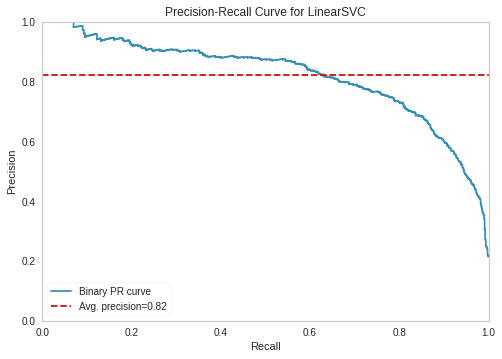

In [113]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.05, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [114]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [116]:
eval(rf, X_train_count, X_test_count)

[[2984  468]
 [ 136  647]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3452
           1       0.58      0.83      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.85      0.79      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     13809
           1       0.60      0.84      0.70      3131

    accuracy                           0.87     16940
   macro avg       0.78      0.86      0.81     16940
weighted avg       0.89      0.87      0.87     16940



In [117]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.843506
test_f1           0.657853
test_recall       0.813164
test_precision    0.552887
dtype: float64

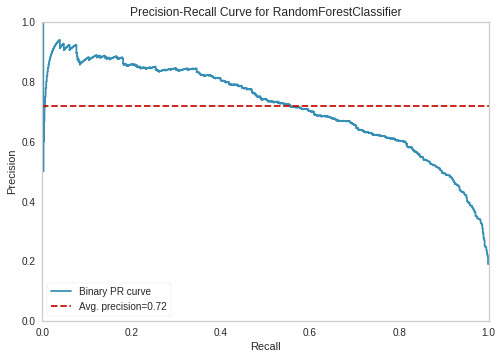

In [118]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [119]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [120]:
rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [121]:
eval(rf, X_train_tf_idf, X_test_tf_idf)

[[2899  553]
 [ 141  642]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3452
           1       0.54      0.82      0.65       783

    accuracy                           0.84      4235
   macro avg       0.75      0.83      0.77      4235
weighted avg       0.88      0.84      0.85      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13809
           1       0.57      0.87      0.69      3131

    accuracy                           0.86     16940
   macro avg       0.77      0.86      0.80     16940
weighted avg       0.89      0.86      0.87     16940



In [122]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.826623
test_f1           0.636452
test_recall       0.819869
test_precision    0.520435
dtype: float64

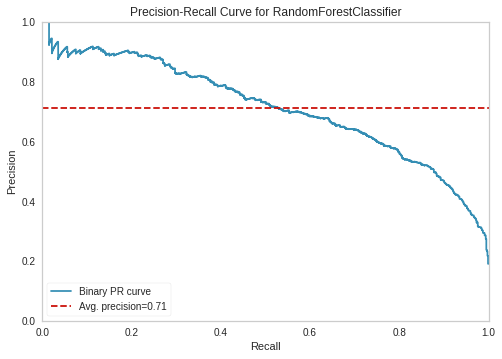

In [123]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [124]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [129]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 1000, random_state = 42, learning_rate=0.9)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=1000, random_state=42)

In [130]:
eval(ada, X_train_count, X_test_count)

[[3273  179]
 [ 267  516]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3452
           1       0.74      0.66      0.70       783

    accuracy                           0.89      4235
   macro avg       0.83      0.80      0.82      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13809
           1       0.90      0.81      0.86      3131

    accuracy                           0.95     16940
   macro avg       0.93      0.90      0.91     16940
weighted avg       0.95      0.95      0.95     16940



In [131]:
model = AdaBoostClassifier(n_estimators= 1000, random_state = 42, learning_rate=0.9)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.898524
test_f1           0.708792
test_recall       0.668785
test_precision    0.754551
dtype: float64

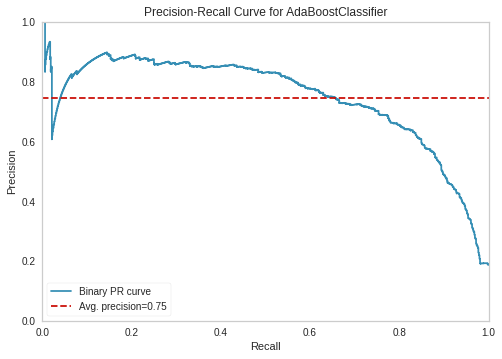

In [132]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 1000, random_state = 42, learning_rate=0.9),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [133]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [134]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.9)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=500, random_state=42)

In [135]:
eval(ada, X_train_tf_idf, X_test_tf_idf)

[[3263  189]
 [ 257  526]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3452
           1       0.74      0.67      0.70       783

    accuracy                           0.89      4235
   macro avg       0.83      0.81      0.82      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13809
           1       0.87      0.78      0.83      3131

    accuracy                           0.94     16940
   macro avg       0.91      0.88      0.89     16940
weighted avg       0.94      0.94      0.94     16940



In [139]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.9)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.895691
test_f1           0.694843
test_recall       0.642920
test_precision    0.756396
dtype: float64

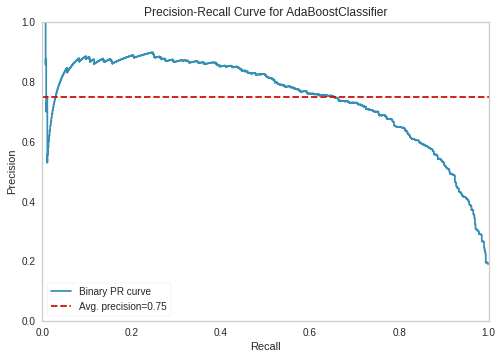

In [140]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.9),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [141]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [143]:
df

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


### Tokenization

In [144]:
num_words = 10000 
tokenizer = Tokenizer(num_words=num_words)  

In [145]:
tokenizer.fit_on_texts(X)

### Creating word index

In [146]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [147]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [148]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [149]:
X[150]

"This will be perfect for the mild fall weather in texas. it's light weight and i love that the top is a little more fitted and the bottom swings out."

In [150]:
print(X_num_tokens[150])

[7, 56, 29, 50, 12, 1, 2484, 167, 440, 9, 2066, 33, 186, 223, 3, 2, 21, 20, 1, 25, 6, 4, 52, 49, 255, 3, 1, 174, 2416, 62]


### Maximum number of tokens for all documents¶

In [151]:
len(X_num_tokens[150])

30

In [152]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [153]:
num_tokens.mean()

60.0256906729634

In [154]:
num_tokens.max()

116

In [155]:
num_tokens.argmax()

15213

In [156]:
X[num_tokens.argmax()]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [157]:
max_tokens = num_tokens.max()

In [158]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [159]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [160]:
X_pad.shape

(21175, 116)

In [161]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [162]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [163]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [164]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [167]:
model = Sequential()

In [168]:
embedding_size = 50

In [169]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [170]:
optimizer = Adam(lr=0.003)

In [171]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [172]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           500000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 519,753
Trainable params: 519,753
Non-trainable params: 0
_________________________________________________________________


In [173]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="auto", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [174]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.70465512, 0.61339642])

In [175]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 13s 19ms/step - loss: 0.4132 - recall: 0.8144 - val_loss: 0.2377 - val_recall: 0.7954
Epoch 2/25
149/149 [==============================] - 2s 13ms/step - loss: 0.2250 - recall: 0.9273 - val_loss: 0.2800 - val_recall: 0.8619
Epoch 2: early stopping


In [176]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.413209,0.814363,0.237707,0.795396
1,0.225001,0.927335,0.279981,0.861893


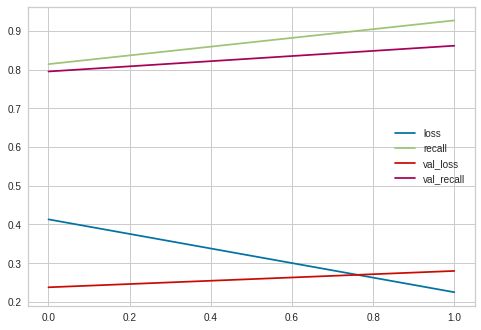

In [177]:
model_loss.plot()

In [178]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[14743   791]
 [  449  3074]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     15534
           1       0.80      0.87      0.83      3523

    accuracy                           0.93     19057
   macro avg       0.88      0.91      0.90     19057
weighted avg       0.94      0.93      0.94     19057



In [179]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[1608  119]
 [  80  311]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.72      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.86      0.85      2118
weighted avg       0.91      0.91      0.91      2118



In [180]:
from sklearn.metrics import precision_recall_curve, average_precision_score

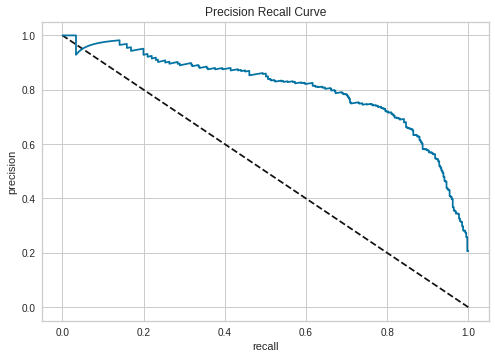

In [181]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [182]:
average_precision_score(y_test, y_pred_proba)

0.8071459589077861

In [184]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [185]:
#!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 30.0 MB/s 
     |████████████████████████████████| 163 kB 75.4 MB/s 
     |████████████████████████████████| 6.6 MB 58.6 MB/s 


### Tokenization

In [187]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [188]:
np.array(max_token).mean()

76.31556080283353

In [189]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [190]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [191]:
Xids, Xmask = transformation(X)

In [192]:
Xids.shape

(21175, 162)

In [193]:
Xmask.shape

(21175, 162)

In [194]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Transformation text to tensor

In [195]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [196]:
batch_size = 32
length = len(X)
# shuffle and batch
# fit into a batch of 32
dataset = dataset.shuffle(length, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [197]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### Creating Model

In [198]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [203]:
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [204]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [205]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1) 

594/594 [==============================] - 663s 1s/step - loss: 0.1969 - recall: 0.7528 - val_loss: 0.1424 - val_recall: 0.8514


### Model evaluation

In [206]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1747
           1       0.84      0.85      0.85       397

    accuracy                           0.94      2144
   macro avg       0.90      0.91      0.91      2144
weighted avg       0.94      0.94      0.94      2144



In [207]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15493
           1       0.90      0.91      0.91      3515

    accuracy                           0.97     19008
   macro avg       0.94      0.95      0.94     19008
weighted avg       0.97      0.97      0.97     19008



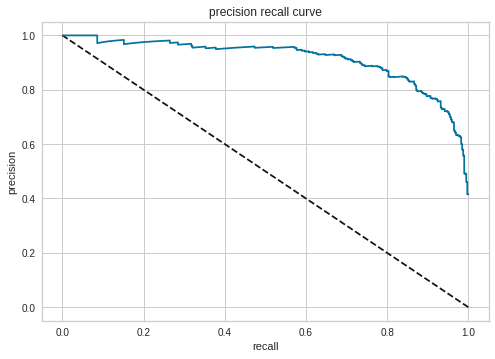

In [208]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [209]:
average_precision_score(y_test, y_pred_proba)

0.9146950987782145

In [210]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

In [211]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [212]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [213]:
weights = {0:0.2, 1:0.8}

In [214]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1, class_weight=weights)

594/594 [==============================] - 657s 1s/step - loss: 0.0386 - recall: 0.9627 - val_loss: 0.1830 - val_recall: 0.9521


In [215]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1747
           1       0.73      0.95      0.82       397

    accuracy                           0.92      2144
   macro avg       0.86      0.94      0.89      2144
weighted avg       0.94      0.92      0.93      2144



In [216]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15493
           1       0.83      0.99      0.91      3515

    accuracy                           0.96     19008
   macro avg       0.92      0.97      0.94     19008
weighted avg       0.97      0.96      0.96     19008



In [217]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

0.9245195954523039

In [218]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

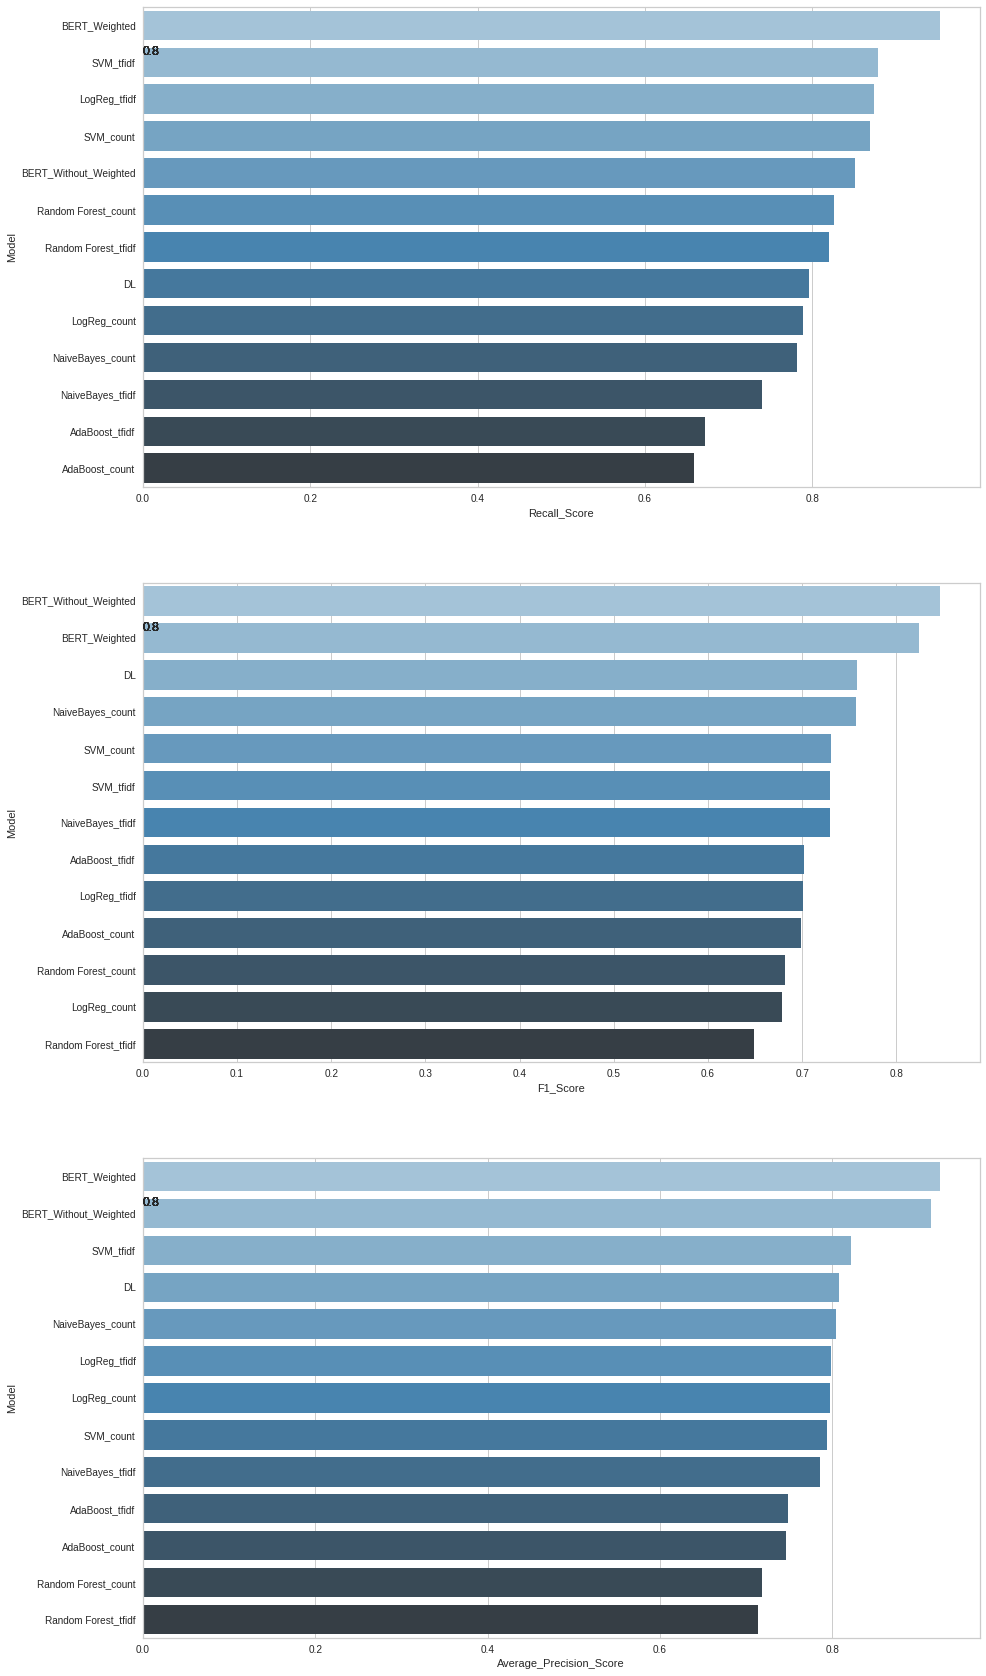

In [221]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
     for p in ax.patches:
         ax.annotate(str(p.get_height()), (p.get_x() * 1.5, p.get_height() * 1))
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();